# 236756 - Machine Learning - Exercise 3
## Ron Sailer - 313341596
## Adam Erdreich - 302325709

In [17]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from itertools import combinations

from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, scale, FunctionTransformer
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

pd.set_option('display.max_columns', 100) # to display all columns at all time
pd.options.mode.chained_assignment = None # to ignore false-positive warnings about chained assignments


In [18]:
data = pd.read_csv('ElectionsData.csv',header=0)
train = pd.read_csv('modified/afterpp_train.csv', header=0)
test = pd.read_csv('modified/afterpp_test.csv', header=0)
validation = pd.read_csv('modified/afterpp_validation.csv',header=0)

# merged train and test
train_test = pd.concat([train, test], keys=['train', 'test'])

for df in [train,test,validation,train_test]:
    df.drop([x for x in df.columns.values if 'Unnamed' in x],axis=1,inplace=True)

## Training different models

In [19]:
train_data = train.drop(['Vote'],axis=1)
train_data_labels = train['Vote']

test_data = test.drop(['Vote'],axis=1)
test_labels = test['Vote']

def print_metrics(clf):
    clf.fit(train_data, train_data_labels)
    test_pred = clf.predict(test_data)
    print "accuracy:", metrics.accuracy_score(test_labels, test_pred)
    print "precision:", metrics.precision_score(test_labels, test_pred,average='weighted')
    print "recall:", metrics.recall_score(test_labels, test_pred,average='macro')
    print "f1 score:", metrics.f1_score(test_labels, test_pred,average='weighted')
    return test_pred

In [20]:
train_data

,Yearly_ExpensesK,Yearly_IncomeK,Overall_happiness_score,Avg_Residancy_Altitude,Most_Important_Issue_Education,Most_Important_Issue_Environment,Most_Important_Issue_Financial,Most_Important_Issue_Foreign_Affairs,Most_Important_Issue_Healthcare,Most_Important_Issue_Military,Most_Important_Issue_Other,Most_Important_Issue_Social,Will_vote_only_large_party,Financial_agenda_matters
0,0.688225,0.687757,0.688560,0.580132,0,0,0,0,0,0,1,0,1.0,1.0
1,0.677262,0.685288,0.683000,0.578213,0,0,0,1,0,0,0,0,1.0,1.0
2,0.609747,0.638948,0.644165,0.514479,0,0,0,0,0,0,0,1,1.0,0.0
3,0.625241,0.644655,0.675658,0.564170,0,1,0,0,0,0,0,0,1.0,0.0
4,0.618274,0.651110,0.656188,0.577447,0,0,0,0,1,0,0,0,1.0,0.0
5,0.664133,0.671524,0.649632,0.539463,0,0,0,0,1,0,0,0,1.0,0.0
6,0.642674,0.645308,0.650188,0.564044,0,1,0,0,0,0,0,0,1.0,0.0
7,0.598613,0.637870,0.640305,0.607938,0,0,0,0,0,0,0,1,1.0,0.0
8,0.639826,0.648233,0.650645,0.520176,1,0,0,0,0,0,0,0,1.0,0.0
9,0.596557,0.635745,0.649901,0.588606,0,0,1,0,0,0,0,0,1.0,0.0


### Random Forest

In [21]:
forest = RandomForestClassifier(n_estimators = 60,criterion='gini',n_jobs=-1,random_state=1)
test_pred = print_metrics(forest)

accuracy: 0.867
precision: 0.867899499029
recall: 0.905618124386
f1 score: 0.867275320758


### Decision Trees

In [22]:
tree = DecisionTreeClassifier(random_state=1)
test_pred = print_metrics(tree)

accuracy: 0.8215
precision: 0.82088918263
recall: 0.871502015834
f1 score: 0.821124128806


### Neural Network

Note: This may return a warning because a class is empty (no instances were classified as that class)

In [23]:
from sklearn.neural_network import MLPClassifier

nerual_network = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
test_pred = print_metrics(nerual_network)

accuracy: 0.4215
precision: 0.252193370065
recall: 0.468637854764
f1 score: 0.284557063962


### KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

nbrs = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
test_pred = print_metrics(nbrs)

accuracy: 0.798
precision: 0.813651875098
recall: 0.855456124571
f1 score: 0.801039204237


### RBF SVM

patience.. this runs for about 20-30 seconds

In [25]:
from sklearn.svm import SVC

svm = SVC(gamma=5, C=1000000)
test_pred = print_metrics(svm)

accuracy: 0.8695
precision: 0.876723181581
recall: 0.920252766991
f1 score: 0.870616526355


### Gaussian Process

Doesn't work because of overflows

In [26]:
#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.gaussian_process.kernels import RBF

#gaussian = GaussianProcessClassifier(1.0 * RBF(1.0))
#print_metrics(gaussian)

## Predict the majority of votes

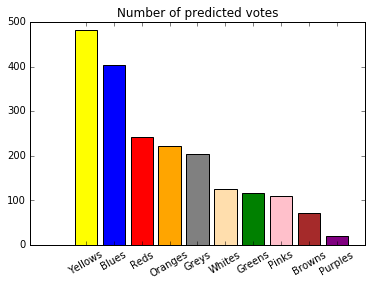

In [27]:
parties = []
def PlotVoteHistogramBasedOnClassifier(clf):
    global parties
    global test_pred
    test_pred = clf.predict(test_data)
    c = Counter(test_pred)

    c = c.most_common()
    parties, votes = zip(*[x for x in c])


    colors = [x[:-1] if x != 'Whites' else 'navajowhite' for x in parties]

    f, ax = plt.subplots()
    ax.set_title('Number of predicted votes')
    ax.bar(range(len(c)), [x[1] for x in c], align="center",color=colors)
    plt.xticks(range(len(c)), parties, rotation=30)
    plt.show()

PlotVoteHistogramBasedOnClassifier(svm)

## Confusion Matrix

In [28]:
pd.DataFrame(confusion_matrix(test_labels, test_pred, labels=parties), columns=parties, index=parties)

,Yellows,Blues,Reds,Oranges,Greys,Whites,Greens,Pinks,Browns,Purples
Yellows,433,73,3,16,25,0,0,0,0,0
Blues,34,290,16,0,1,0,0,0,0,0
Reds,0,37,222,0,7,0,0,0,0,0
Oranges,9,0,0,195,12,0,0,0,0,0
Greys,6,3,1,12,160,0,0,0,0,0
Whites,0,0,0,0,0,123,0,1,0,0
Greens,0,0,0,0,0,2,115,1,0,0
Pinks,0,0,0,0,0,1,1,108,0,0
Browns,0,0,0,0,0,0,0,0,72,0
Purples,0,0,0,0,0,0,0,0,0,21


## Look at that!

Yellows, Blues, Reds, Oranges are exclusively confused with one-another.
The same goes for Greys, Whites and Greens

Let's try something out: Let's build a classifier for each of these "clusters"

We've tried running different classifiers on the different "clusters", such as {Browns, Purples}, {Whites, Greens, Pinks} and {Yellows, Blues, Reds, Oranges, Greys} and our best **mix** of models (pick the best performing classifier for each cluster) got a 100%, 98% and 84% accuracy respectively on the clusters.

We thought, maybe if we "clustered" those parties and then built a classifier to predict to which cluster someone belongs to, and then run a classifier for each cluster, we'd achieve better results.

The problem is that with a weighted average, those 100%, 98% and 84% are as good as running the original classifier, and that means that even if we got a 100% accuracy on identifying the classifier, we're no better than just running a simple model. 

So we threw this idea away..

# "The 4th Predication Task"

we want to identify the factors who'se manipulation is likely to change the winning party.

# Method
we will first introduce "Feature Manipulatiors", that can take a single feature and change its values in a manner that will hopefully have an impact.
e.g.: multiply by constant, add constant, "anti-normalize" (push values away from mean, creating a "reverse gaussian bell").
These manipulations will only be used on the TEST DATA, which will then be used to predict the winners based on the UNMODIFIED classifiers that were originally trained.

we're going with the scientific method here, trying a bunch of staff and registering what happens.

# Desired Impact
As it now stand, "Yellows" win the vote, with a pretty slim ~100 vote (5% of total voters in the set) lead over "Blues", with the rest of the parties starggling behind, so intuitively the easiest approach will be to look for manipulations that will make voters leave the "Yellows" and favor the other parties, or have people from the smaller parties support "Blues" (not necessarily transfer Yellow voters to vote Blue, but any arrangemnt where less people will vote Yellow and/or more people will vote Blue).

Of course we might encounter such manipulations that drive down both currently leading parties and give the win to any other party who will suddenly be favored over both of them!


<img src="https://i.ytimg.com/vi/dy35CStbVzg/maxresdefault.jpg" style="width: 50%; height: auto;" />

In [37]:
## this section defines manipulators for continuous numerical features.
## we are working with normalized data here, so when manipulating you should make sure
## the new data makes sense.

class MultiplyManipulator():
    def __init__(self, factor):
        self.factor = factor
        
    def __call__(self, series):
        series *= self.factor
        return series
    
class AddManipulator():
    def __init__(self, factor):
        self.factor = factor
        
    def __call__(self, series):
        series += self.factor
        return series
    

class MaxManipulator():
    def __init__(self):
        pass
        
    def __call__(self, series):
        max = series.max()
        series.where(series>max, other=max, inplace=True)
        return series

class MinManipulator():
    def __init__(self):
        pass
        
    def __call__(self, series):
        min = series.min()
        series.where(series<min, other=min, inplace=True)
        return series

class AvgManipulator():
    def __init__(self):
        pass
        
    def __call__(self, series):
        min, avg = series.min(), series.mean()
        series.where(series<min, other=avg, inplace=True)
        return series
    
class DichotomyManipulator():
    def __init__(self):
        pass
        
    def __call__(self, series):
        min,max,avg = series.min(), series.max(), series.mean()
        series.where(series<=avg, other=max, inplace=True)
        series.where(series>avg, other=min, inplace=True)
        return series

In [30]:
manipulators = [
    ("maxxer" , MaxManipulator()),
    ("minner" , MinManipulator()),
    ("dichotomizer", DichotomyManipulator())
]

In [31]:

def TryManipulatorsWithClassifierOnFeatue(manipulators, classifier, feature):
    global test_data
    test_copy = test_data.copy() # save an unmodified copy for restoration
    for m_name, m_func in manipulators:
        print "Manipulating",feature,"with:",m_name
        m_func(test_data[feature])
        PlotVoteHistogramBasedOnClassifier(classifier)
        test_data = test_copy.copy() # restore original test_data


### Residancy Altitude
we've seen a strong connection between Avg_Residancy_Altitude and a voter's label,
so we'll the effects of changing ONLY this feature:

Manipulating Avg_Residancy_Altitude with: maxxer


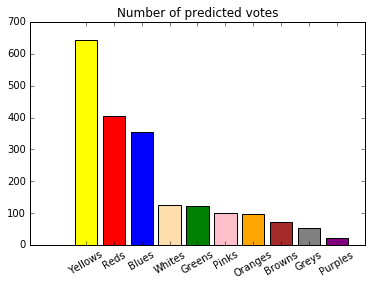

Manipulating Avg_Residancy_Altitude with: minner


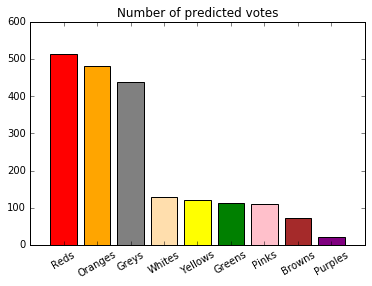

Manipulating Avg_Residancy_Altitude with: dichotomizer


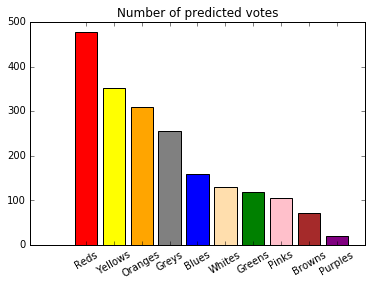

In [32]:
TryManipulatorsWithClassifierOnFeatue(manipulators, svm, 'Avg_Residancy_Altitude')

we can see that the most dramatic decline to Yellow's voterbase occurs when using "minner", while the Reds double their votes and surpass even the original "Yellows" vote. notice - in this case "Blues" [the original runner-ups don't get even a single vote!]

using "maxxer" gives "Yellows" an even stronger lead, mostly on the expense of "Oranges" and "Greys", while "Blues" remain basically unchanged with a little less than 400 voters from the total 2000 in the set.

dichotomizing the voters [everyone below average - moves to minimum, everyone above - to maximum] gives the now expected result - "Reds" and "Yellows" on top.

this is a good time to remind the fact that each sample's vote is predicted by an already trained classifier and independently of the rest of the modified samples.

the meaning of this is that having more voters come from small values of "Avg_Residancy_Altitude" will increase Red's voterbase, while taking out voter with a higher values, will harm "Yellows", to a level where "Reds" overtake and win the election.

### Overall Happiness Score
another noticable feature is "standalone", which somewhat "partitions" the voters, in a sense that you can say "No voters with a score out of the threshlod [A,B] voted for party P".
let's try our manipulators on them.

Manipulating Overall_happiness_score with: maxxer


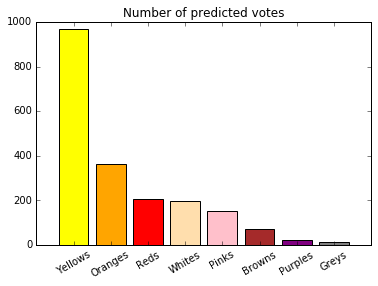

Manipulating Overall_happiness_score with: minner


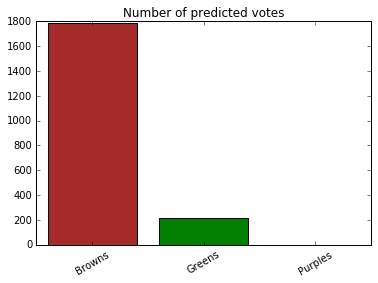

Manipulating Overall_happiness_score with: dichotomizer


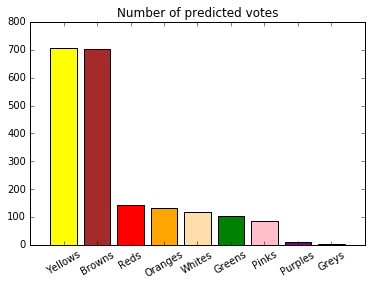

In [33]:
TryManipulatorsWithClassifierOnFeatue(manipulators, svm, 'Overall_happiness_score')

Oh wow!

"Yellows" seem to benefit from high happiness score, reaching almost 50% of the total votes on "maxxer",
but even more staggering is the result of low happiness score - almost all voters (90%) go with "Browns"!

this time the dichotomy reaches almost a tie, with both "Browns" and "Yellows" scraping 700 votes each.

That's definitely recommendation for the "Browns": get as many people with low happiness score to vote! they are definitely your crowd.

### Yearly Income

Manipulating Yearly_IncomeK with: maxxer


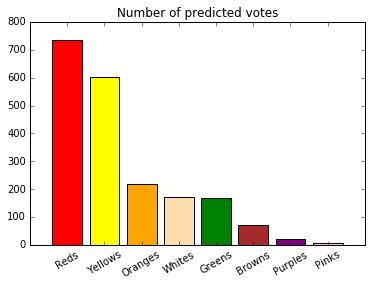

Manipulating Yearly_IncomeK with: minner


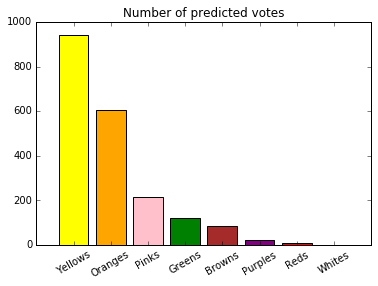

Manipulating Yearly_IncomeK with: dichotomizer


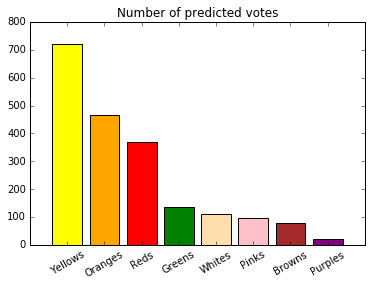

In [36]:
TryManipulatorsWithClassifierOnFeatue(manipulators, svm, 'Yearly_IncomeK')

Both "Yellows" and "Reds" seem to be more favored with people with high Yerly Income, with an advantage to "Reds", while with low income - "Yellows" have a clear advantage.

in both scenarios - the "Blues" lose all support!
that raises the hypothesis that their voterbase is composed mostly of "Average Joes" in the sense of Yearly Income, let's check:

Manipulating Yearly_IncomeK with: avg


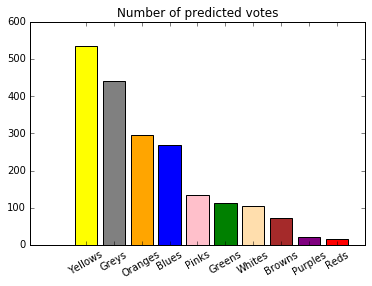

In [41]:
TryManipulatorsWithClassifierOnFeatue([("avg",AvgManipulator())], svm, 'Yearly_IncomeK')

The blues did seem 

Blues did make a slight comeback, but "Yellows" are still going strong, and in-fact in all of our modified graphs they gain more votes than originally predicted...